# Water Potability Classification


## Data Preprocessing

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#importing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#importing Classification ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
#style for the visualizations
sns.set_style('darkgrid')

In [15]:
import psycopg2 as ps

# Connect to the PostgreSQL database
#conn = psycopg2.connect(database="database_name", user="user_name", password="password", host="host_address", port="port_number")
conn=ps.connect(
    host="localhost",
    database="WaterQuality",
    user="postgres",
    password="8021", port=5432)

# create a cursor object
cur = conn.cursor()

#Query 1: execute a SELECT statement to retrieve all data from a table
cur.execute("SELECT * FROM water_table ")



#fetch all rows from the result set
rows = cur.fetchall()

#print the data
for row in rows:
     print(row)
     print("___________________________________")
    


(None, Decimal('204.8904555'), Decimal('20791.31898'), Decimal('7.300211873'), Decimal('368.5164413'), Decimal('564.3086542'), Decimal('10.37978308'), Decimal('86.99097046'), Decimal('2.963135381'), Decimal('0'))
___________________________________
(Decimal('3.716080075'), Decimal('129.4229205'), Decimal('18630.05786'), Decimal('6.635245884'), None, Decimal('592.8853591'), Decimal('15.18001312'), Decimal('56.32907628'), Decimal('4.500656275'), Decimal('0'))
___________________________________
(Decimal('8.099124189'), Decimal('224.2362594'), Decimal('19909.54173'), Decimal('9.275883603'), None, Decimal('418.6062131'), Decimal('16.86863693'), Decimal('66.42009251'), Decimal('3.05593375'), Decimal('0'))
___________________________________
(Decimal('8.316765884'), Decimal('214.3733941'), Decimal('22018.41744'), Decimal('8.059332377'), Decimal('356.8861356'), Decimal('363.2665162'), Decimal('18.4365245'), Decimal('100.3416744'), Decimal('4.628770537'), Decimal('0'))
________________________

In [16]:
#Query 2: print 20 Turbidity values for drinkable water
print("The Turbidity for drinkable water is:")
cur.execute("SELECT Turbidity FROM water_table WHERE Potability = 1 LIMIT 20")

turb_l = cur.fetchall()
for turb_values in turb_l:
    print(turb_values)
    print("____________________________________")

The Turbidity for drinkable water is:
(Decimal('3.875165247'),)
____________________________________
(Decimal('3.985250506'),)
____________________________________
(Decimal('2.747312999'),)
____________________________________
(Decimal('3.8549399'),)
____________________________________
(Decimal('3.939895657'),)
____________________________________
(Decimal('2.437296288'),)
____________________________________
(Decimal('4.052135728'),)
____________________________________
(Decimal('5.217895024'),)
____________________________________
(Decimal('2.764633881'),)
____________________________________
(Decimal('3.53559633'),)
____________________________________
(Decimal('3.404632906'),)
____________________________________
(Decimal('4.375223811'),)
____________________________________
(Decimal('3.611860372'),)
____________________________________
(Decimal('4.10692449'),)
____________________________________
(Decimal('4.437695749'),)
____________________________________
(Decimal('3.368757217

In [17]:
#Query 3: find the acceptable ph values for the water to be drinkable 
cur.execute("SELECT MIN(ph),MAX(ph) FROM water_table WHERE Potability = 1")
ph_range = cur.fetchall()

print("The range of ph values for drinkable water is:",ph_range)

The range of ph values for drinkable water is: [(Decimal('0.22749905'), Decimal('13.17540172'))]


In [18]:
#Query 4: find the average quantity of organic carbon present in the water samples
cur.execute("SELECT AVG(Organic_carbon) FROM water_table")
avg_org_carbon = cur.fetchall()

print("Average value for organic carbon:",avg_org_carbon)

Average value for organic carbon: [(Decimal('14.2849702476761294'),)]


In [19]:
#Query 5: arrange the records in the table based on the quantity of Solids, in an increasing order
cur.execute("SELECT * FROM water_table ORDER BY Solids ASC;")
solids_asc = cur.fetchall()

print("Records arranged by increasing number of solids:")


for values in solids_asc:
    print(values)
    print("____________________________________")

Records arranged by increasing number of solids:
(Decimal('7.417823927'), Decimal('243.304691'), Decimal('320.9426113'), Decimal('4.598669852'), Decimal('336.0979811'), Decimal('361.1017694'), Decimal('20.42147204'), Decimal('87.05257595'), Decimal('3.470812079'), Decimal('0'))
____________________________________
(Decimal('5.324641431'), Decimal('142.806978'), Decimal('728.7508296'), Decimal('8.403316437'), None, Decimal('496.9976016'), Decimal('15.17466373'), Decimal('60.0778524'), Decimal('3.652003355'), Decimal('1'))
____________________________________
(Decimal('6.185924892'), Decimal('236.0347826'), Decimal('1198.943699'), Decimal('6.140033164'), Decimal('374.095388'), Decimal('436.2361983'), Decimal('11.09381062'), Decimal('99.77507789'), Decimal('4.090264382'), Decimal('1'))
____________________________________
(Decimal('5.731042139'), Decimal('223.7049656'), Decimal('1351.906979'), Decimal('6.496722628'), Decimal('380.5140788'), Decimal('620.3046389'), Decimal('14.6729271'), D

In [20]:

# close the cursor and the connection
cur.close()
conn.close()

In [21]:
df =pd.read_csv(r"C:\Users\HOME\Downloads\drinking_water_potability.csv")

In [22]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [24]:
df.shape

(3276, 10)

In [25]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

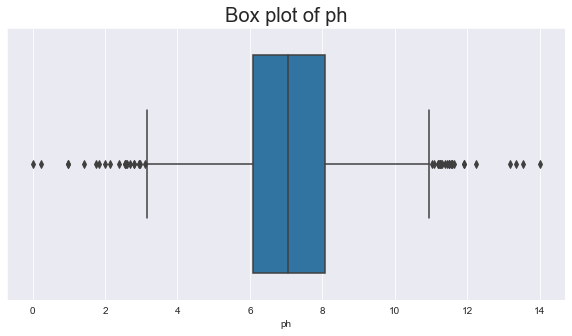

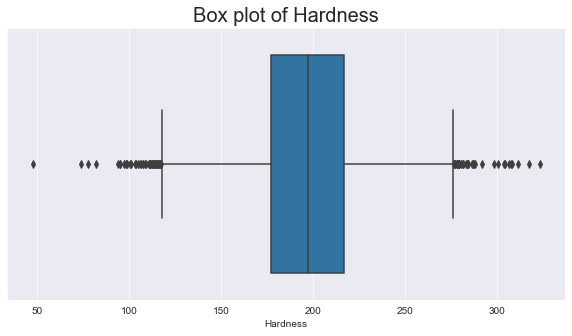

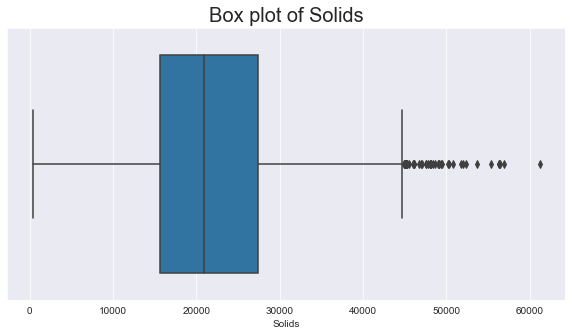

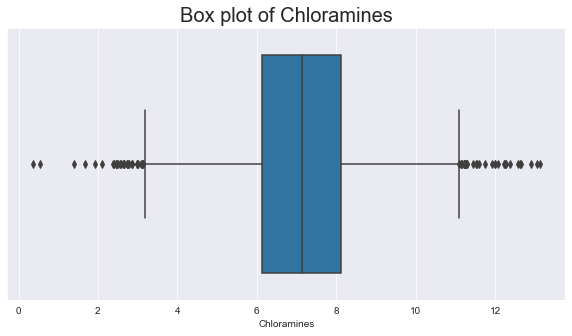

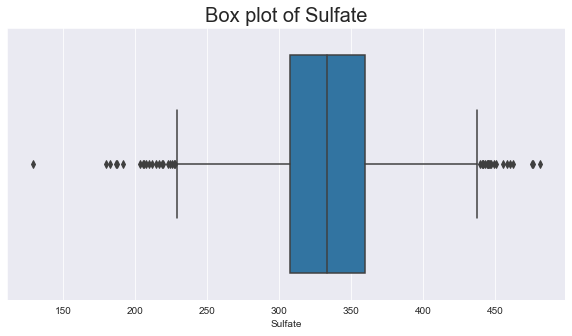

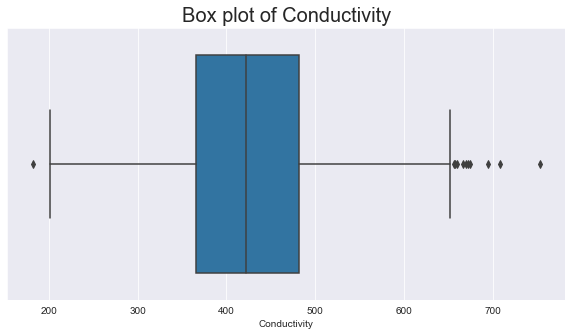

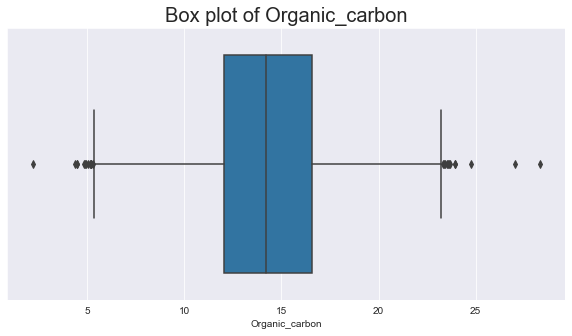

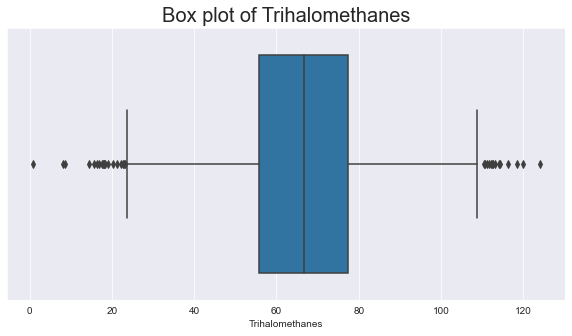

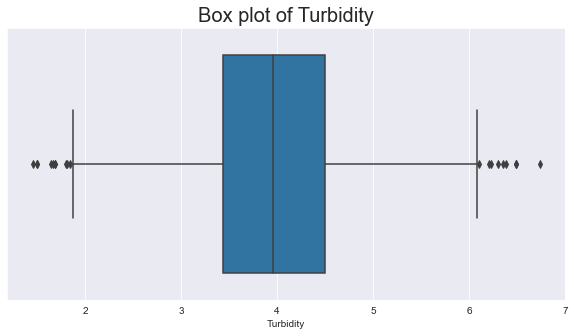

In [26]:
#Visualising the statistical summary using boxplots

for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20)
    

In [27]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [28]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0.5, 1.0, 'Histogram plot of Ph Value')

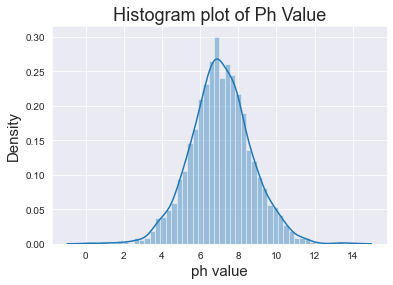

In [29]:
#To decide how to fill the null values, we plot the distribution of the columns with null values
sns.distplot(df['ph'])
plt.xlabel('ph value', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Histogram plot of Ph Value', fontsize=18)


Text(0.5, 1.0, 'Histogram plot of Sulfate')

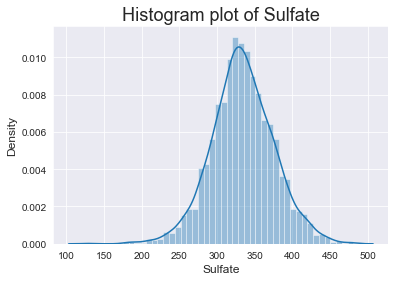

In [30]:
sns.distplot(df['Sulfate'])
plt.xlabel('Sulfate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Histogram plot of Sulfate', fontsize=18)

Text(0.5, 1.0, 'Histogram plot of Trihalomethanes')

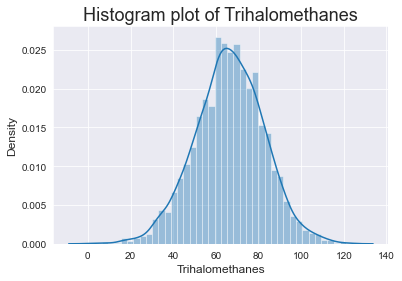

In [31]:
sns.distplot(df['Trihalomethanes'])
plt.xlabel('Trihalomethanes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Histogram plot of Trihalomethanes', fontsize=18)

In [32]:
#the columns with null values have a normal distribution thus we will fill 
#the null values using mean

In [33]:
''' preparing data for model '''
#filling null values depending on the mean of each class label of Potability: to increase the accuracy of the model
ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean_1

traih_mean = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_mean

trah_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_mean_1

In [34]:
#Check if null values have been removed
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Relational Analysis

Text(0.5, 1.0, 'Correlation Matrix')

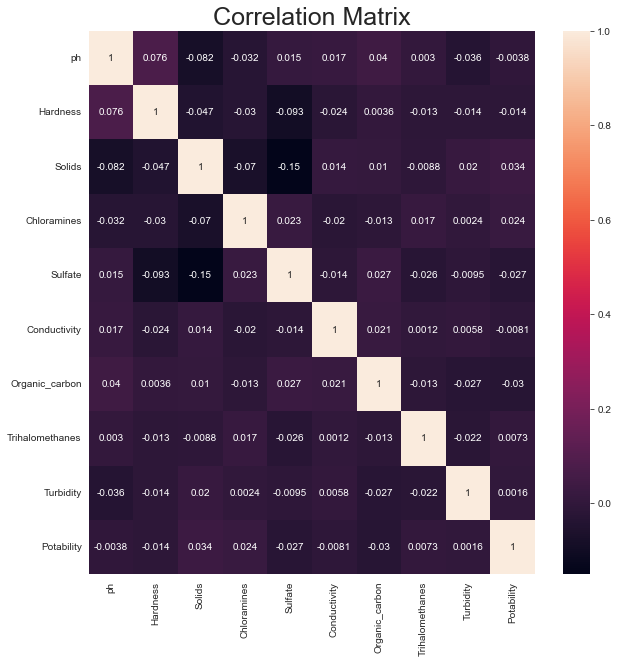

In [35]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=25)

<Figure size 720x720 with 0 Axes>

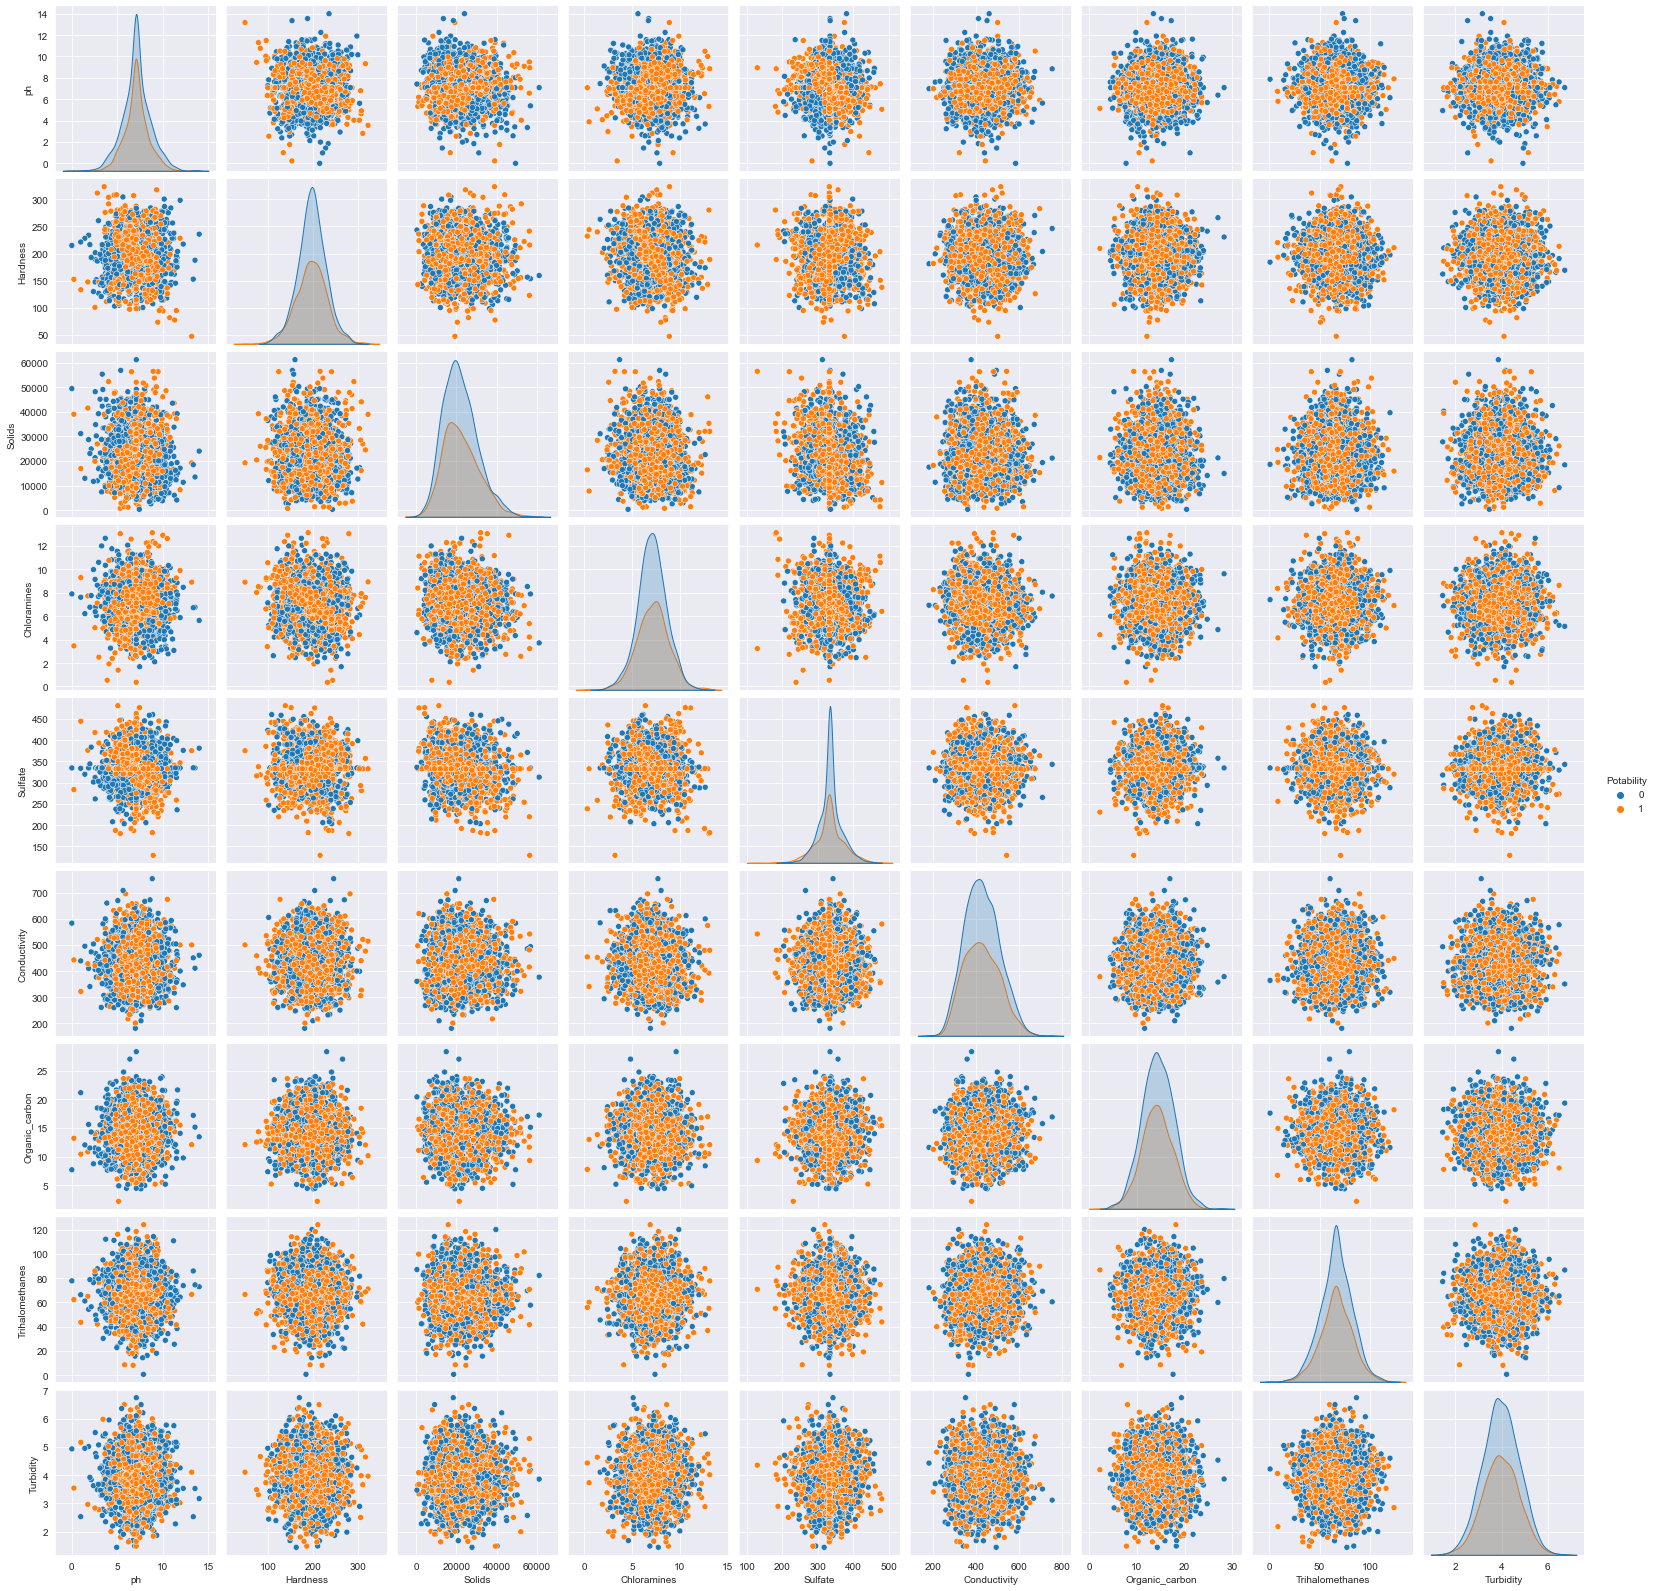

In [36]:
#Pairplot
plt.figure(figsize=(10,10))
sns.pairplot(data=df,hue='Potability')
#orange: potable water
#blue: not potable water

In [37]:
#Visualising the statistical summary

In [38]:
''' box plot is used to represent the statistical summary of all the features in the dataset'''


' box plot is used to represent the statistical summary of all the features in the dataset'

## Feature Selection

In [39]:
# lets see feature importance
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1) #independent variables
y =df.Potability #dependent variables
Ext = ExtraTreesClassifier()
Ext.fit(x,y)
print(Ext.feature_importances_)

[0.12662927 0.11214058 0.10845921 0.10819577 0.1646476  0.09487161
 0.09717937 0.09524532 0.09263127]


<AxesSubplot:>

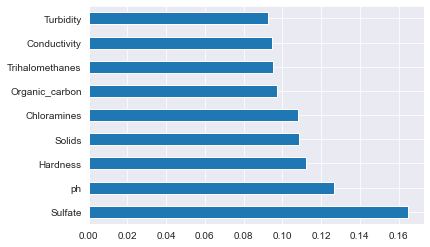

In [40]:
#plotting the importance of features
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [41]:
#All the features are important thus we will take them all for prediction

## Model Building

In [42]:
''' independent and dependent features '''
X = df.iloc[:, :-1] #independent variable
y = df.iloc[:, -1]  #dependent variable: Potability

In [43]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2620, 9)
X_test shape:  (656, 9)


In [45]:
#features of the given dataset fluctuate significantly within their ranges
#They are recorded in various units of measurement
#We will use Standard Scaler
''' standard scaler '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'count')

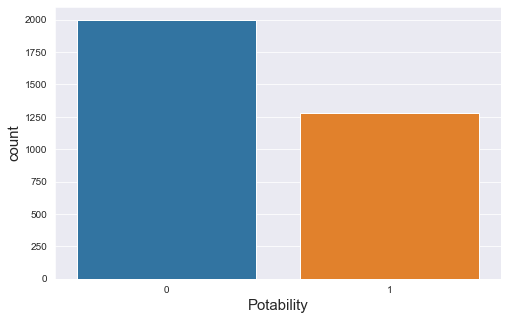

In [47]:
#Value counts of potability: to check if the data is imbalanced
pot_lbl = df.Potability.value_counts()

#barplot
plt.figure(figsize=(8,5))
sns.barplot(x=pot_lbl.index, y=pot_lbl)
plt.xlabel('Potability',fontsize=15)
plt.ylabel('count',fontsize=15)

In [54]:
#To fix the data imbalance, the synthetic data is created to increase the samples of the minority class 
#and make them equal to the samples of the majority class
from imblearn.over_sampling import SMOTE

# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [55]:
models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC(),GradientBoostingClassifier()]

for model in models:
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    ''' appending result to model_acc'''
    models_acc.append(accuracy_score(y_test, pred))

In [56]:
''' creating dataframe '''
res = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC','GradientBoosting']
})

In [57]:
res.sort_values(by=['Model Accuracy'], ascending=False)

Model Accuracy              Model Name
2        0.800305  RandomForestClassifier
5        0.791159        GradientBoosting
4        0.682927                     SVC
1        0.635671    KNeighborsClassifier
0        0.626524      LogisticRegression
3        0.615854              GaussianNB

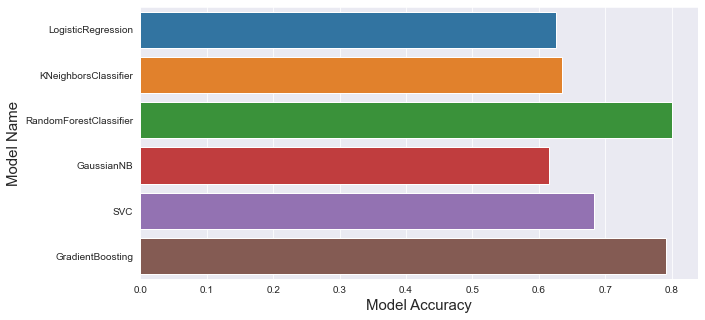

In [58]:
''' barplot plot models accuracy '''
plt.figure(figsize=(10, 5))
sns.barplot(x=res['Model Accuracy'], y=res['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);


## Output prediction

In [59]:

# Initialize a random forest classifier with default hyperparameters
rf = RandomForestClassifier()

# Train the random forest model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf.predict(X_test)
print(y_pred)



[1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 1 